In [64]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
from scipy.fft import fft, ifft, fftfreq, rfft, rfftfreq
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import pylab
import scipy.signal as signal

number of channels = 2
length = 3.0 sec


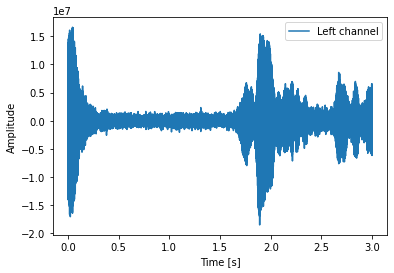

In [56]:
sr, y = wavfile.read("janela.wav")
print(f"number of channels = {y.shape[1]}")

a, b = (2, 5) # start and stop in seconds
a = a*44100
b = b*44100

yshape = y[a:b, 0].shape[0]
y = y[a:b, 0]

length = yshape / sr

print(f"length = {length} sec")

x = np.linspace(0., length, yshape)
plt.plot(x, y, label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
ipd.Audio(y, rate=sr)

102.152552086139 214.6569057571824


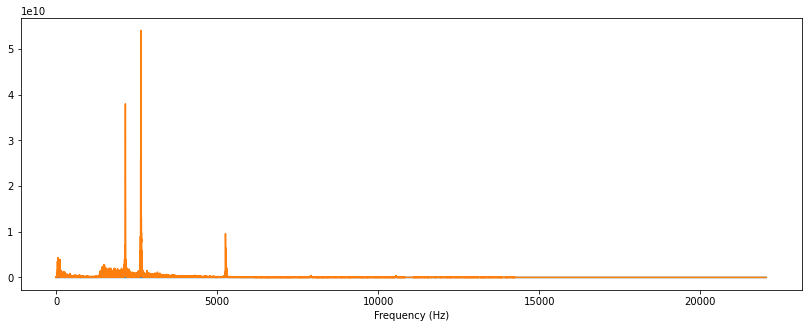

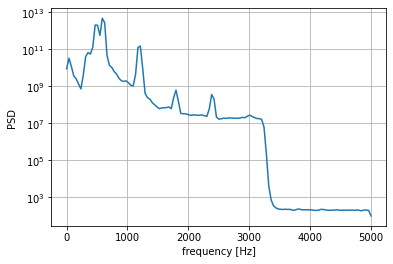

In [72]:
# Number of samples in normalized_tone
N = yshape #sr * duration
yf = rfft(y)
xf = rfftfreq(N, 1 / sr)

yfa = 20*np.log10(np.abs(yf))
print(yfa.min(), yfa.max())

fs = 10e3

plt.figure(figsize=(14, 5))
plt.plot(xf, yfa) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.plot(xf, np.abs(yf))
plt.show()

f, Pwelch_spec = signal.welch(y, fs, scaling='spectrum')
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [58]:
# normalized_sample = np.int16((np.abs(yf) / np.abs(yf).max()) * 32767)

In [59]:
n = y.size
samplespace = 1
freqs = rfftfreq(n, d=samplespace)
print(freqs.min(), freqs.max())

0.0 0.5


In [107]:
yfa = 20*np.log10(np.abs(yf))
threshold = 200
idx = np.argwhere(yfa>threshold)

freq = freqs[idx]
freq_in_herz = abs(freq * sr)
freq_list = []
for freq1, freq2 in zip(freq_in_herz, freq_in_herz[1:]):
    if (freq2 - freq1) >= 1: 
        print("Frequency in hertz: ", freq1[0])
        freq_list.append(freq1[0])


Frequency in hertz:  2144.333333333333
Frequency in hertz:  2158.6666666666665
Frequency in hertz:  2624.0
Frequency in hertz:  2636.333333333333
Frequency in hertz:  2639.6666666666665
Frequency in hertz:  2644.333333333333
Frequency in hertz:  2645.6666666666665


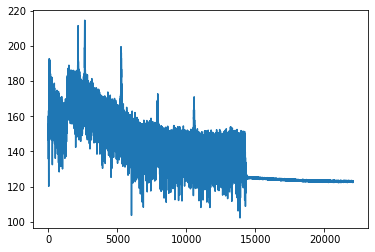

In [108]:
plt.plot(xf, yfa)
plt.show()

h
h
h
h
h
h
h


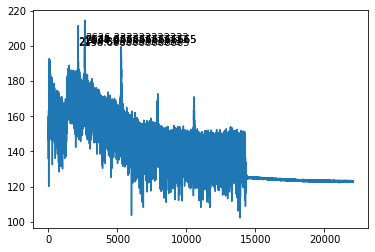

In [114]:
plt.plot(xf, yfa)
for i, (a, b) in enumerate(zip(xf, yfa)): 
    if b >= threshold:
        b2 = abs(freqs[i]*sr)
        if b2 in freq_list:
            plt.text(a, b, str(b2))
            print("h")